### Image Segmentaion with Watershed Algorithm

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
img = cv.imread('images/water_coins.jpg')

# Convert the image to grayscale for segmentation
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

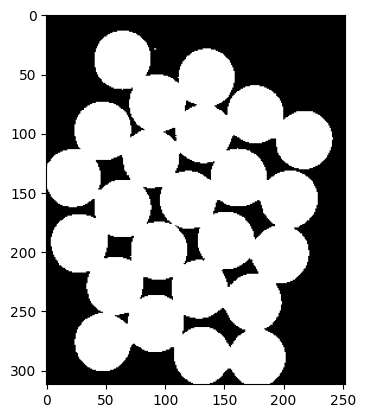

In [4]:
plt.imshow(thresh, cmap='gray')

In [5]:
# Apply morphological operations to remove noise
kernel = np.ones((3,3), np.uint8)
opening = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel, iterations=2)

# Sure background area
# Sure background area is the area which is not the part of the object
sure_bg = cv.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
# Sure foreground area is the area which is the part of the object
dist_transform = cv.distanceTransform(opening, cv.DIST_L2, 5)
ret, sure_fg = cv.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg, sure_fg)

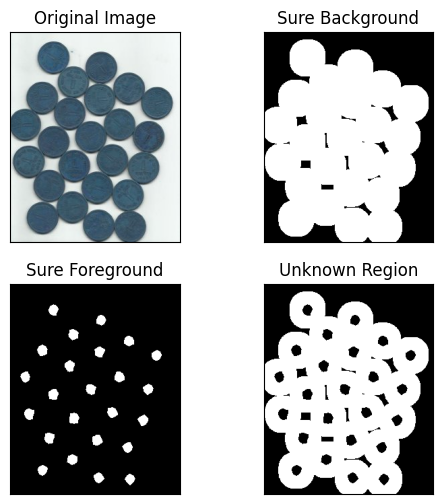

In [8]:
# Plot the above images
plt.figure(figsize=(6,6))
plt.subplot(221), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(sure_bg, cmap='gray')
plt.title('Sure Background'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(sure_fg, cmap='gray')
plt.title('Sure Foreground'), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(unknown, cmap='gray')
plt.title('Unknown Region'), plt.xticks([]), plt.yticks([])
plt.show()

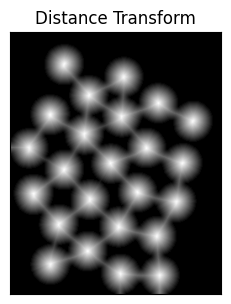

In [10]:
# Distance transform plot and thresholded distance transform plot
plt.figure(figsize=(6,6))
plt.subplot(121), plt.imshow(dist_transform, cmap='gray')
plt.title('Distance Transform'), plt.xticks([]), plt.yticks([])
plt.show()

In [11]:
# Marker labelling
# In the watershed algorithm, the regions to be segmented are marked with integers.
ret, markers = cv.connectedComponents(sure_fg)

# Add one to all the markers so that sure background is not 0, but 1
markers = markers + 1

# Mark the region of unknown with 0
markers[unknown==255] = 0

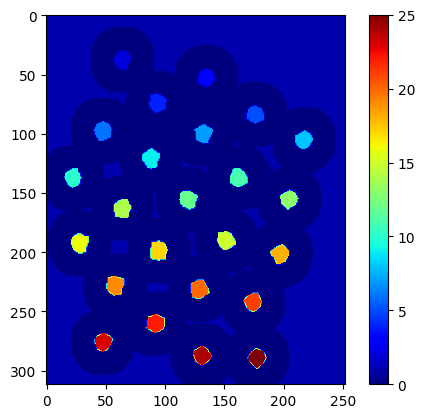

In [12]:
plt.imshow(markers, cmap='jet')
plt.colorbar()

In [13]:
# Apply watershed algorithm
# The boundary region will be marked with -1
markers = cv.watershed(img, markers)
img[markers == -1] = [255,0,0]

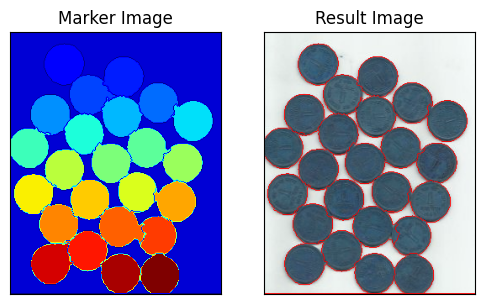

In [16]:
plt.figure(figsize=(6,6))
plt.subplot(121), plt.imshow(markers, cmap='jet')
plt.title('Marker Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img)
plt.title('Result Image'), plt.xticks([]), plt.yticks([])
plt.show()